<a href="https://colab.research.google.com/github/Sasnika/Coursera_Capstone/blob/master/Final_project_coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IBM Applied Data Science Capstone Course by Coursera

Opening a new shopping mall in Bangalore,India

1.**Importing libraries**

In [179]:
import numpy as np 
import pandas as pd 

import json 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


In [180]:
!pip install geocoder

In [181]:
import geocoder

2. **Creating a csv file from scraping data from Wikipedia page into a DataFrame**

In [182]:
url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore"
wiki_url = requests.get(url)
wiki_url

<Response [200]>

In [183]:
wiki_data = pd.read_html(wiki_url.text)
wiki_data

[                 Name  Image                                            Summary
 0     Cantonment area    NaN  The Cantonment area in Bangalore was used as a...
 1              Domlur    NaN  Formerly part of the Cantonment area, Domlur h...
 2         Indiranagar    NaN  Indiranagar is a sought-after residential and ...
 3   Jeevanbheemanagar    NaN                                                NaN
 4         Malleswaram    NaN                                                NaN
 5           Pete area    NaN  Established by Kempe Gowda I at the time of cr...
 6      Sadashivanagar    NaN  Sadashivanagar is an upscale neighbourhood in ...
 7       Seshadripuram    NaN  Seshadripuram was established in 1892 to reduc...
 8        Shivajinagar    NaN  Shivajinagar is one of the older areas of the ...
 9              Ulsoor    NaN  Ulsoor (or Halasuru) is one of the oldest area...
 10      Vasanth Nagar    NaN  Located south of Bangalore Palace, Vasanth Nag...,
                Name  Image

In [184]:
len(wiki_data), type(wiki_data)

(10, list)

In [185]:
df = pd.read_csv('/content/Dataset_bangalore.csv')
df.head(10)

,Unnamed: 0,Borough,Neighborhood,Latitude,Longitude
0,0,Central,Cantonment area,12.972442,77.580643
1,1,Central,Domlur,12.960992,77.638726
2,2,Central,Indiranagar,12.971891,77.641151
3,3,Central,Jeevanbheemanagar,12.962900,77.659500
4,4,Central,Malleswaram,13.003100,77.564300
5,5,Central,Pete area,12.962700,77.575800
6,6,Central,Sadashivanagar,13.006800,77.581300
7,7,Central,Seshadripuram,12.993500,77.578700
8,8,Central,Shivajinagar,12.985700,77.605700
9,9,Central,Ulsoor,12.981700,77.628600


In [186]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [187]:
df.shape

(65, 4)

In [188]:
# Getting the geographical coordinates
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bangalore'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [189]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in df["Neighborhood"].tolist() ]
coords

[[30.608490000000074, -87.32711999999998],
 [12.943290000000047, 77.65602000000007],
 [13.030060000000049, 77.49526000000003],
 [12.96601000000004, 77.65767000000005],
 [13.006319846827683, 77.5684048532483],
 [12.966180000000065, 77.58690000000007],
 [13.014830000000075, 77.57771000000008],
 [12.993550000000027, 77.57988000000006],
 [12.98720000000003, 77.60401000000007],
 [12.989080000000058, 77.62795000000006],
 [12.990730000000042, 77.58861000000007],
 [12.927340000000072, 77.67169000000007],
 [12.978998883947433, 77.6561320596952],
 [12.99198000000007, 77.71506000000005],
 [13.000390000000039, 77.68368000000004],
 [12.994090000000028, 77.66633000000007],
 [12.954660000000047, 77.70752000000005],
 [12.943480000000022, 77.74703000000005],
 [12.975230000000067, 77.75238000000007],
 [13.019646729517714, 77.65469401219607],
 [13.02642000000003, 77.62437000000006],
 [13.038700000000063, 77.66192000000007],
 [13.014300000000048, 77.63685000000004],
 [12.968020000000024, 77.52114000000006

In [190]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [191]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
borough_colors

{'Central': '#8321F3',
 'Eastern': '#031BCC',
 'NorthEastern': '#48E027',
 'Northern': '#BEF255',
 'SouthEastern': '#BF9DA6',
 'Southern': '#F3D96F',
 'SouthernSuburbs': '#DDC030',
 'Western': '#D1A3A2'}

3. **Visualizing the map of Bangalore**

In [192]:
# Coordinates of Bangalore
address = 'Bangalore, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore,India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore,India 12.9791198, 77.5912997.


In [193]:
# create map of Bangalore using latitude and longitude values
bangalore_map = folium.Map(location=[latitude, longitude], zoom_start=12,control_scale=True)

# add markers to map
for lat, lng, boro, neighborhood in zip(df['Latitude'], df['Longitude'],df['Borough'], df['Neighborhood']):
    label_text = boro + ' - ' + neighborhood
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        tooltip=label_text,
        radius=4,
        popup=label,
        color=borough_colors[boro],
        fill=True,
        fill_color=borough_colors[boro],
        fill_opacity=0.7).add_to(bangalore_map)  
    
bangalore_map


4. **Initializing Foursquare API credentials**

In [194]:
CLIENT_ID = '5TOQ1V2HVGFAHQVVBQ20P04AMSZ3VEK2WT0N5QRKOH1QNBHC' # Foursquare ID 
CLIENT_SECRET = 'UGUBNVKHM3VOMWTZ114H33DHQQGE0WPLOE5XFB3GEWNGI1IJ'
VERSION = '20201028' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5TOQ1V2HVGFAHQVVBQ20P04AMSZ3VEK2WT0N5QRKOH1QNBHC
CLIENT_SECRET:UGUBNVKHM3VOMWTZ114H33DHQQGE0WPLOE5XFB3GEWNGI1IJ


In [195]:
#get the top 100 venues that are within a radius of 2000 meters
radius = 2000
LIMIT = 100

venues = []

for lat, long,boro, neighborhood in zip(df['Latitude'], df['Longitude'],df['Borough'], df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            boro,
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
  


In [196]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Borough','Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(3626, 8)


,Borough,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Central,Cantonment area,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Central,Cantonment area,12.972442,77.580643,Chikkana Tiffin Room,12.968557,77.584282,Indian Restaurant
2,Central,Cantonment area,12.972442,77.580643,Udupi Sri Krishna Bhavan,12.971563,77.574158,Indian Restaurant
3,Central,Cantonment area,12.972442,77.580643,SGS Donne Biriyani,12.970325,77.572648,Indian Restaurant
4,Central,Cantonment area,12.972442,77.580643,Lakshmi Nataraj Refreshments,12.967476,77.579468,South Indian Restaurant


In [197]:
venues_df.groupby(["Neighborhood"]).count()

,Borough,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,,
Anjanapura,5,5,5,5,5,5,5
Arekere,90,90,90,90,90,90,90
BTM Layout,100,100,100,100,100,100,100
Banashankari,51,51,51,51,51,51,51
Banaswadi,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...
Vidyaranyapura,11,11,11,11,11,11,11
Vijayanagar,35,35,35,35,35,35,35
Whitefield,49,49,49,49,49,49,49


In [198]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 211 uniques categories.


In [199]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Seafood Restaurant', 'Indian Restaurant',
       'South Indian Restaurant', 'Hotel', 'Bookstore', 'Racetrack',
       'Shopping Mall', 'Park', 'French Restaurant',
       'Japanese Restaurant', 'Italian Restaurant', 'Ice Cream Shop',
       'Lounge', 'Asian Restaurant', 'Deli / Bodega', 'Bakery',
       'Cupcake Shop', 'Hotel Bar', 'Vietnamese Restaurant',
       'Fried Chicken Joint', 'Theater', 'Clothing Store',
       'Furniture / Home Store', 'Brewery', 'Mexican Restaurant',
       'Art Gallery', 'Boutique', 'Dessert Shop', 'Cocktail Bar',
       'Coffee Shop', 'Vegetarian / Vegan Restaurant', 'Golf Course',
       'Bed & Breakfast', 'Arcade', 'Karnataka Restaurant', 'Wine Bar',
       'Restaurant', 'Track Stadium', 'Capitol Building', 'Pub', 'Spa',
       'Chinese Restaurant', 'Parsi Restaurant', 'Fast Food Restaurant',
       'Bagel Shop', 'Breakfast Spot', 'Motorcycle Shop',
       'Sushi Restaurant', 'Café', 'Movie Theater'], dtype=object)

In [200]:
# check if the results contain "Shopping Mall"
"Neighborhood" in venues_df['VenueCategory'].unique()

True

In [201]:
individual_bangalore_venue_count = venues_df.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area           100
        Domlur                    100
        Indiranagar               100
        Jeevanbheemanagar         100
        Malleswaram               100
...                               ...
Western Nandini Layout             24
        Nayandahalli               24
        Rajajinagar               100
        Rajarajeshwari Nagar       36
        Vijayanagar                35

[65 rows x 1 columns]

In [202]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
individual_bangalore_venue_count.reset_index(inplace=True)
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,100
1,Central,Domlur,100
2,Central,Indiranagar,100
3,Central,Jeevanbheemanagar,100
4,Central,Malleswaram,100
...,...,...,...
60,Western,Nandini Layout,24
61,Western,Nayandahalli,24
62,Western,Rajajinagar,100
63,Western,Rajarajeshwari Nagar,36


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kalyan Nagar'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'Peenya'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'

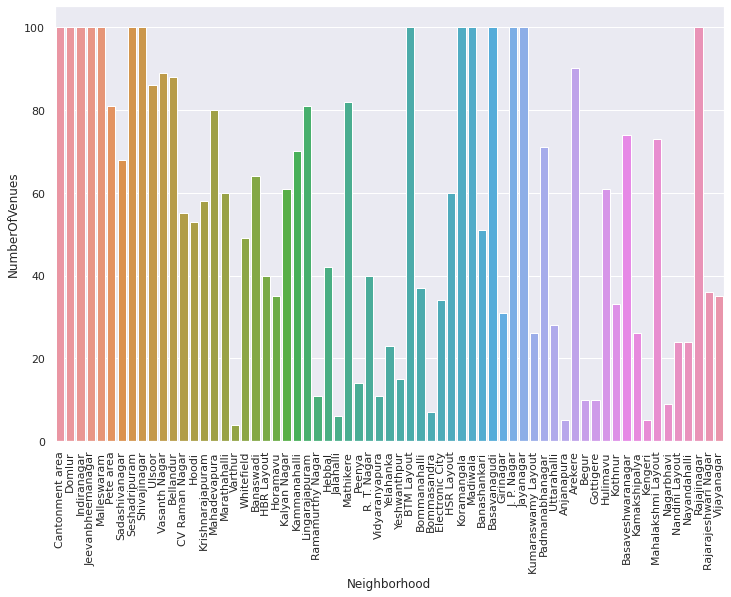

In [203]:
sns.set(rc={'figure.figsize':(12,8)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

5. **Analyze Each Neighborhood**

In [204]:
# one hot encoding
bl_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bl_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bl_onehot.columns[-1]] + list(bl_onehot.columns[:-1])
bl_onehot = bl_onehot[fixed_columns]

print(bl_onehot.shape)
bl_onehot.head()

(3626, 212)


,Neighborhoods,ATM,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Shop,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,...,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Toll Booth,Toll Plaza,Toy / Game Store,Track Stadium,Trail,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [205]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
bl_grouped = bl_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(bl_grouped.shape)
bl_grouped

(65, 212)


,Neighborhoods,ATM,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Shop,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,...,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Toll Booth,Toll Plaza,Toy / Game Store,Track Stadium,Trail,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Anjanapura,0.2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,Arekere,0.0,0.000000,0.0,0.0,0.011111,0.011111,0.000000,0.0,0.0,0.000000,0.022222,0.0,0.0,0.0,0.011111,0.011111,0.0,0.011111,0.00,0.000000,0.0,0.0,0.011111,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.011111,0.000000,0.011111,0.0,0.011111,0.0,0.0,0.000000,...,0.011111,0.0,0.0,0.0,0.011111,0.000000,0.0,0.022222,0.000000,0.000000,0.000000,0.0,0.033333,0.0,0.0,0.011111,0.0,0.0,0.000000,0.011111,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.022222,0.0,0.0,0.011111,0.0,0.0
2,BTM Layout,0.0,0.000000,0.0,0.0,0.000000,0.010000,0.000000,0.0,0.0,0.000000,0.010000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.050000,0.02,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.010000,0.0,0.010000,0.0,0.0,0.000000,...,0.020000,0.0,0.0,0.0,0.030000,0.000000,0.0,0.010000,0.000000,0.040000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.010000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.020000,0.0,0.0,0.000000,0.0,0.0
3,Banashankari,0.0,0.019608,0.0,0.0,0.000000,0.000000,0.019608,0.0,0.0,0.019608,0.019608,0.0,0.0,0.0,0.000000,0.000000,0.0,0.039216,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.039216,0.000000,0.0,0.019608,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.039216,0.000000,0.039216,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,0.000000,0.019608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.019608,0.0,0.0,0.000000,0.0,0.0
4,Banaswadi,0.0,0.000000,0.0,0.0,0.000000,0.015625,0.000000,0.0,0.0,0.015625,0.000000,0.0,0.0,0.0,0.046875,0.000000,0.0,0.046875,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.000000,0.000000,0.015625,0.0,0.015625,0.0,0.0,0.000000,...,0.015625,0.0,0.0,0.0,0.015625,0.000000,0.0,0.015625,0.000000,0.015625,0.000000,0.0,0.031250,0.0,0.0,0.000000,0.0,0.0,0.015625,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.031250,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Vidyaranyapura,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0

In [206]:
len(bl_grouped[bl_grouped["Shopping Mall"] > 0])

32

Create a new DataFrame for Shopping Mall data only

In [207]:
bangalore_mall = bl_grouped[["Neighborhoods","Shopping Mall"]]
bangalore_mall.head()

,Neighborhoods,Shopping Mall
0,Anjanapura,0.000000
1,Arekere,0.022222
2,BTM Layout,0.010000
3,Banashankari,0.039216
4,Banaswadi,0.015625


6. **Cluster Neighborhoods**

Run k-means to cluster the neighborhoods in Bangalore into 3 clusters.

In [208]:
# set number of clusters
kclusters = 3

bl_clustering = bangalore_mall.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 2, 1, 2, 0, 0, 0, 2, 0], dtype=int32)

In [209]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
bl_merged = bangalore_mall.copy()

# add clustering labels
bl_merged["Cluster Labels"] = kmeans.labels_

In [210]:
bl_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
bl_merged.head()

,Neighborhood,Shopping Mall,Cluster Labels
0,Anjanapura,0.000000,0
1,Arekere,0.022222,2
2,BTM Layout,0.010000,2
3,Banashankari,0.039216,1
4,Banaswadi,0.015625,2


In [211]:
# merge bangalore_grouped with bangalore_data to add latitude/longitude for each neighborhood
bl_merged = bl_merged.join(df.set_index("Neighborhood"), on="Neighborhood")

print(bl_merged.shape)
bl_merged.head()

(65, 6)


,Neighborhood,Shopping Mall,Cluster Labels,Borough,Latitude,Longitude
0,Anjanapura,0.000000,0,SouthernSuburbs,12.8604,77.5612
1,Arekere,0.022222,2,SouthernSuburbs,12.8875,77.5970
2,BTM Layout,0.010000,2,SouthEastern,12.9166,77.6101
3,Banashankari,0.039216,1,Southern,12.9255,77.5468
4,Banaswadi,0.015625,2,NorthEastern,13.0120,77.6471


In [212]:
# sort the results by Cluster Labels
print(bl_merged.shape)
bl_merged.sort_values(["Cluster Labels"], inplace=True)
bl_merged

(65, 6)


,Neighborhood,Shopping Mall,Cluster Labels,Borough,Latitude,Longitude
0,Anjanapura,0.000,0,SouthernSuburbs,12.8604,77.5612
25,Jalahalli,0.000,0,Northern,13.0528,77.5419
26,Jayanagar,0.000,0,Southern,12.9250,77.5938
29,Kamakshipalya,0.000,0,Western,12.9887,77.5271
31,Kengeri,0.000,0,Western,12.8996,77.4827
...,...,...,...,...,...,...
27,Jeevanbheemanagar,0.010,2,Central,12.9629,77.6595
17,HBR Layout,0.025,2,NorthEastern,13.0377,77.6288
24,J. P. Nagar,0.010,2,Southern,12.9105,77.5857
50,Rajajinagar,0.010,2,Western,12.9982,77.5530


Finally, let's visualize the resulting clusters

In [213]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bl_merged['Latitude'], bl_merged['Longitude'], bl_merged['Neighborhood'], bl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [214]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

7. **Examine Clusters**

Cluster 0

In [215]:
bl_merged.loc[bl_merged['Cluster Labels'] == 0]

,Neighborhood,Shopping Mall,Cluster Labels,Borough,Latitude,Longitude
0,Anjanapura,0.0,0,SouthernSuburbs,12.860400,77.561200
25,Jalahalli,0.0,0,Northern,13.052800,77.541900
26,Jayanagar,0.0,0,Southern,12.925000,77.593800
29,Kamakshipalya,0.0,0,Western,12.988700,77.527100
31,Kengeri,0.0,0,Western,12.899600,77.482700
63,Yelahanka,0.0,0,Northern,13.100500,77.594000
35,Kumaraswamy Layout,0.0,0,Southern,12.903800,77.561800
41,Marathahalli,0.0,0,Eastern,12.959200,77.697400
43,Nagarbhavi,0.0,0,Western,12.959900,77.508300
23,Indiranagar,0.0,0,Central,12.971891,77.641151


Cluster 1

In [216]:
bl_merged.loc[bl_merged['Cluster Labels'] == 1]

,Neighborhood,Shopping Mall,Cluster Labels,Borough,Latitude,Longitude
30,Kammanahalli,0.028571,1,NorthEastern,13.0159,77.6379
3,Banashankari,0.039216,1,Southern,12.9255,77.5468
47,Peenya,0.071429,1,Northern,13.0285,77.5197
33,Kothnur,0.030303,1,SouthernSuburbs,12.8734,77.5820
34,Krishnarajapuram,0.034483,1,Eastern,13.0040,77.6878
46,Padmanabhanagar,0.028169,1,Southern,12.9156,77.5568
36,Lingarajapuram,0.037037,1,NorthEastern,13.0084,77.6306
57,Uttarahalli,0.035714,1,Southern,12.9070,77.5521
20,Hoodi,0.037736,1,Eastern,12.9922,77.7159


Cluster 2

In [217]:
bl_merged.loc[bl_merged['Cluster Labels'] == 2]

,Neighborhood,Shopping Mall,Cluster Labels,Borough,Latitude,Longitude
62,Whitefield,0.020408,2,Eastern,12.969800,77.749900
56,Ulsoor,0.011628,2,Central,12.981700,77.628600
55,Shivajinagar,0.020000,2,Central,12.985700,77.605700
4,Banaswadi,0.015625,2,NorthEastern,13.012000,77.647100
1,Arekere,0.022222,2,SouthernSuburbs,12.887500,77.597000
2,BTM Layout,0.010000,2,SouthEastern,12.916600,77.610100
54,Seshadripuram,0.010000,2,Central,12.993500,77.578700
22,Hulimavu,0.016393,2,SouthernSuburbs,12.878900,77.609000
11,CV Raman Nagar,0.018182,2,Eastern,12.985500,77.663900
8,Bellandur,0.011364,2,Eastern,12.926000,77.676200
